In [4]:
!pip install scikit-image
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Load the following image: 'Reduced Trainging data/8/4857.jpg' and visualise the result

In [5]:
from skimage import io, feature, measure
import matplotlib.pyplot as plt

c:\ProgramData\McInstTemp0310991692033525\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


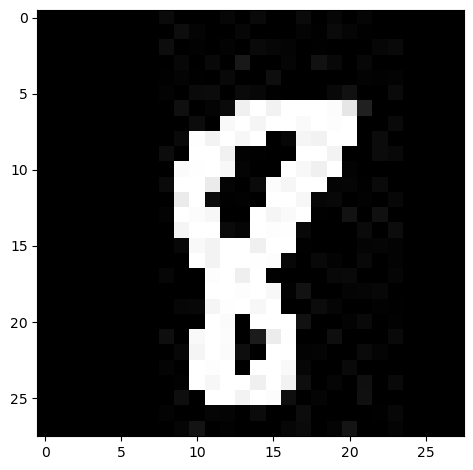

In [6]:
# Excersise 1.1 : Load and display an image
img = io.imread("Reduced MNIST Data/Reduced Trainging data/8/4852.jpg")

io.imshow(img)
plt.show()

Use the Canny edge detection method to detect the edges in the image that was loaded.

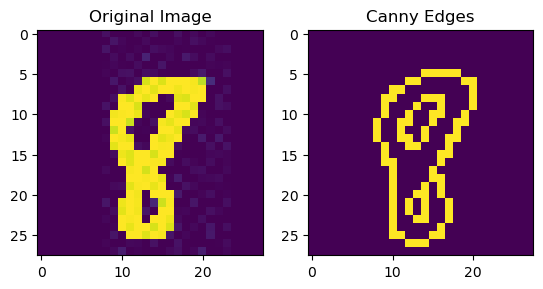

In [7]:
# Excersise 1.2 : Apply Canny Edge Detection
edges = feature.canny(img)

plt.figure()

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(1,2,2)
plt.title("Canny Edges")
plt.imshow(edges)


Use the label measure to detect how many edges there are in this image.

In [8]:
# Excersise 1.3 : Count the number of edges detected
labels = measure.label(edges)
num_edges = labels.max()

print("Amount of edges:", num_edges)

Amount of edges: 2


Height in pixels: 28
Width in pixels: 28


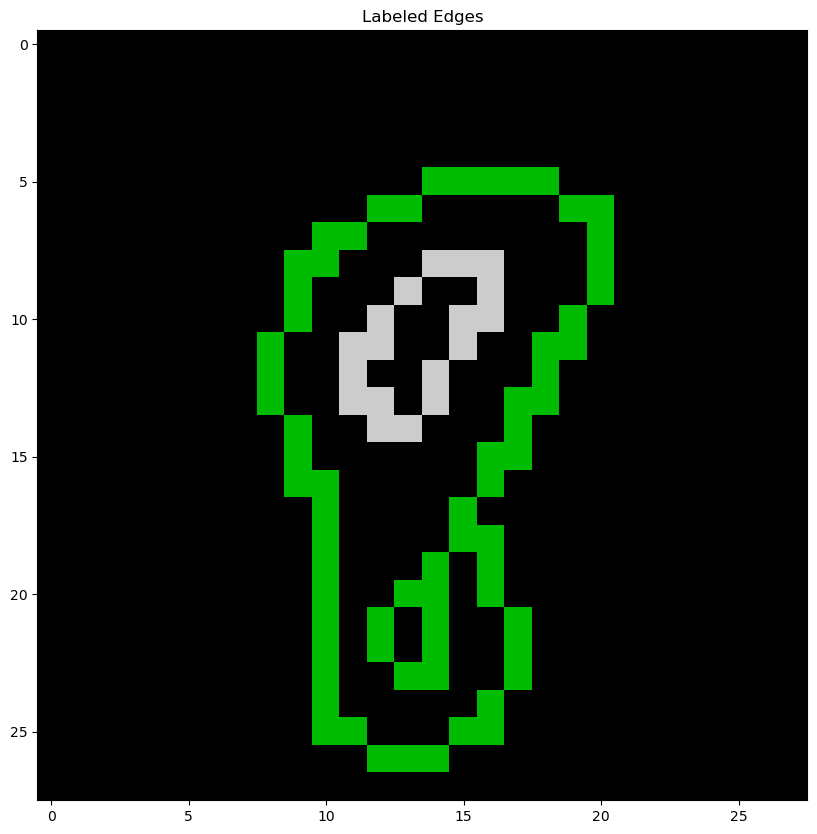

In [ ]:
# Excersise 1.4 : Display the edges with labels

NUMBER_OF_EDGES= {num_edges}
HEIGHT_OF_DIGIT= 
WIDTH_OF_DIGIT= 
MAXIMUM_NUMBER_OF_PIXELS_PER_COLUMN =
MAXIMUM_NUMBER_OF_PIXELS_PER_ROW = 
TOTAL_NUMBER_OF_PIXELS =  

